In [3]:
# !pip install sklearn pandas matplotlib

In [12]:
import pandas as pd
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
from utilities import *
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## global vars

In [2]:
TEST_SIZE=0.2

## read the training data


In [3]:
data = pd.read_csv("train/train.csv").dropna()
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4521252780,1,11,2,0,5,5,1,0,0,...,0,15521,6.8,18175,222,48,-544,-2063,22.2,1552.1
1,4516789805,1,17,2,0,9,4,8,1,0,...,0,15946,6.6,17106,230,52,-3538,-2904,23.0,1594.6
2,4517546735,1,85,6,1,9,1,11,1,1,...,0,13584,7.0,17661,217,42,-5240,-2335,21.7,1358.4
3,4508668617,0,17,3,0,6,4,8,0,0,...,0,15036,6.8,17006,225,40,-1954,-1045,22.5,1503.6
4,4462493939,0,16,2,0,8,9,8,0,0,...,0,18704,7.2,19776,226,52,1720,1376,22.6,1870.4


In [37]:
data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,7.903000e+03,7903.000000,7903.000000,7903.000000,7903.000000,7903.000000,7903.000000,7903.000000,7903.000000,7903.000000,...,7903.000000,7903.000000,7903.000000,7903.000000,7903.000000,7903.000000,7903.000000,7903.000000,7903.000000,7903.000000
mean,4.499943e+09,0.497786,22.153992,2.830824,0.505251,6.172466,6.127547,6.652410,0.546248,0.360369,...,0.042262,16481.460205,6.925117,17957.448943,217.309882,51.280020,-19.029862,35.057320,21.730988,1648.146020
std,2.784372e+07,0.500027,17.720187,2.196290,0.500004,2.995904,2.931458,4.060479,0.626429,0.480138,...,0.214592,1491.704158,0.303919,1193.670605,21.920152,10.038507,2435.822605,1900.044215,2.192015,149.170416
min,4.295358e+09,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8265.000000,10.700000,1121.200000
25%,4.482544e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15419.000000,6.800000,17206.000000,203.000000,44.000000,-1583.000000,-1197.500000,20.300000,1541.900000
50%,4.510838e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16370.000000,7.000000,17958.000000,218.000000,51.000000,-26.000000,26.000000,21.800000,1637.000000
75%,4.521685e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17419.000000,7.200000,18760.000000,233.000000,57.000000,1566.500000,1276.000000,23.300000,1741.900000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,19.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [4]:
X,y = separate_feature_label(data, "blueWins")

## preprocessing and analysis

### get the attributes with low correlation only


<AxesSubplot:>

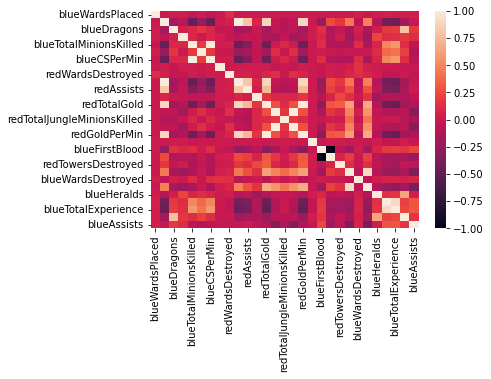

In [14]:

sns.heatmap(X.corr())

In [6]:
corrTable = X.corr()
cols = X.columns

In [7]:
newCols = []
for i in cols:
    for j in cols:
        if( i!=j and abs(corrTable[i][j])<0.01 ):
            newCols.append(j)
newCols = list( pd.Series(newCols).unique() )
print( len(newCols) )
X = X[newCols]

29


In [8]:
len(cols) , len(newCols)
diff_col = [col for col in cols if col not in newCols]
diff_col

['blueKills',
 'blueTotalGold',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueGoldPerMin',
 'redDeaths',
 'redEliteMonsters',
 'redDragons',
 'redGoldDiff',
 'redExperienceDiff']

## remove the outliers


In [16]:
len(newCols)

29

In [28]:
# fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# for i, col in enumerate(newCols):
#     plt.figure()
#     sns.boxplot(x=X[col])

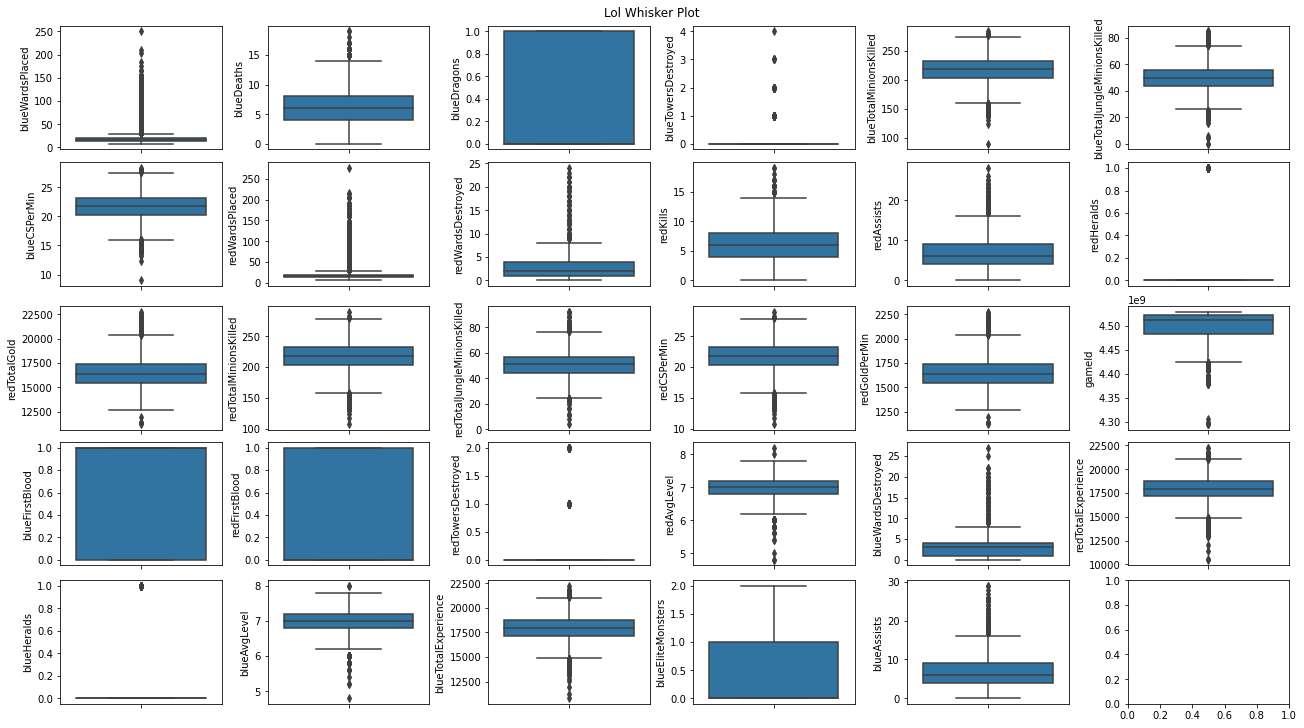

In [36]:
fig, axes = plt.subplots(5, 6, figsize=(18, 10),constrained_layout=True)

fig.suptitle('Lol Whisker Plot')
# plt.figure(figsize=(20, 10), dpi=80)
# let's do a 30 plots
for i, col in enumerate(newCols):
    sns.boxplot(ax=axes[i//6, i - (i//6)*6], data=X, y=newCols[i])
    


### inital model


In [12]:

treeClassifier = tree.DecisionTreeClassifier(
    min_samples_leaf=100, max_depth=10
)
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size=TEST_SIZE, random_state=42)


### parameter tuning and validation


In [13]:
parameters = {'max_depth':[10,11,12,20], 
              'min_samples_leaf':[50,100,150], 
              'min_samples_split':[10,50,100,150,200,250],
              'criterion' : ['gini','entropy']}
scorer = make_scorer(f1_score)

search_obj = RandomizedSearchCV(treeClassifier, parameters, scoring=scorer)
fit_obj = search_obj.fit(X_train, y_train)
best_clf = fit_obj.best_estimator_

print( "Accuracy for tree classifier: "+str( metrics.accuracy_score(y_test, best_clf.predict(X_test)) ) )


Accuracy for tree classifier: 0.7115749525616698


In [14]:
test_this_model(best_clf, newCols)

Accuracy for tree classifier: 0.7130566801619433


## final classifier

In [15]:
treeClassifier = best_clf

[Text(0.4554794520547945, 0.9444444444444444, 'X[16] <= 1576.85\nentropy = 1.0\nsamples = 6322\nvalue = [3161, 3161]'),
 Text(0.1952054794520548, 0.8333333333333334, 'X[26] <= 18651.5\nentropy = 0.822\nsamples = 2086\nvalue = [536, 1550]'),
 Text(0.1095890410958904, 0.7222222222222222, 'X[23] <= 16909.0\nentropy = 0.926\nsamples = 1167\nvalue = [398, 769]'),
 Text(0.0547945205479452, 0.6111111111111112, 'X[26] <= 17813.5\nentropy = 0.754\nsamples = 434\nvalue = [94, 340]'),
 Text(0.0273972602739726, 0.5, 'X[16] <= 1491.35\nentropy = 0.906\nsamples = 202\nvalue = [65, 137]'),
 Text(0.0136986301369863, 0.3888888888888889, 'entropy = 0.778\nsamples = 100\nvalue = [23, 77]'),
 Text(0.0410958904109589, 0.3888888888888889, 'entropy = 0.977\nsamples = 102\nvalue = [42, 60]'),
 Text(0.0821917808219178, 0.5, 'X[2] <= 0.5\nentropy = 0.544\nsamples = 232\nvalue = [29, 203]'),
 Text(0.0684931506849315, 0.3888888888888889, 'entropy = 0.704\nsamples = 115\nvalue = [22, 93]'),
 Text(0.095890410958904

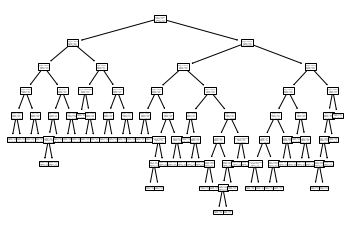

In [16]:
tree.plot_tree(treeClassifier)


## DecisionTree model testing on unseen data

In [17]:

test_data = pd.read_csv("test/test.csv").dropna()


X_test,y_test = separate_feature_label(test_data, "blueWins")
X_test = X_test[newCols]

print( "Accuracy for tree classifier: "+str( metrics.accuracy_score(y_test, treeClassifier.predict(X_test)) ) )


Accuracy for tree classifier: 0.7130566801619433


# Logistic Regression

In [18]:
from sklearn.metrics import accuracy_score
# fit logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## building the model

In [19]:

scaler = MinMaxScaler()
X_reg = X[newCols]
y_reg = y
scaler.fit(X_reg)
X_reg = scaler.transform(X_reg)

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=TEST_SIZE, random_state=42)

In [20]:

logisticRegressor = LogisticRegression()
logisticRegressor.fit(X_train, y_train)

# get accuracy score
pred_lm = logisticRegressor.predict(X_test)
acc_lm = accuracy_score(pred_lm, y_test)
print(acc_lm)

0.7273877292852625


## LogisticRegression model testing on unseen data

In [21]:

test_data = pd.read_csv("test/test.csv").dropna()


X_test,y_test = separate_feature_label(test_data, "blueWins")
X_test = X_test[newCols]
X_test = scaler.transform(X_test)

print( "Accuracy for LogisticRegression classifier: "+str( metrics.accuracy_score(y_test, logisticRegressor.predict(X_test)) ) )


Accuracy for LogisticRegression classifier: 0.7338056680161943


# Adaboost Classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier

## Model tuning

In [23]:
print(len(newCols))

29


In [24]:
ababooster = AdaBoostClassifier(n_estimators=100, random_state=42)

ababooster.fit(X_train, y_train)

# get accuracy score
pred_lm = ababooster.predict(X_test)
acc_lm = accuracy_score(pred_lm, y_test)
print(acc_lm)

0.7277327935222672


In [25]:
ababooster = AdaBoostClassifier(n_estimators=100, random_state=42)

parameters = {
        'n_estimators':[90,100,150],
        'base_estimator':[tree.DecisionTreeClassifier( max_depth=1),tree.DecisionTreeClassifier( max_depth=2)]
            }
scorer = make_scorer(f1_score)

search_obj = RandomizedSearchCV(ababooster, parameters, scoring=scorer)
fit_obj = search_obj.fit(X_train, y_train)
best_clf = fit_obj.best_estimator_

print( "Accuracy for tree classifier: "+str( metrics.accuracy_score(y_test, best_clf.predict(X_test)) ) )


/home/mohammed/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy for tree classifier: 0.728744939271255


In [26]:
print(fit_obj.cv_results_)

{'mean_fit_time': array([1.02593341, 1.28318238, 1.89358268, 2.42616773, 2.44506764,
       3.11209898]), 'std_fit_time': array([0.08679626, 0.06537423, 0.14634611, 0.25347505, 0.39089284,
       0.13302109]), 'mean_score_time': array([0.04583559, 0.06773996, 0.07635245, 0.06331153, 0.07573733,
       0.0783277 ]), 'std_score_time': array([0.01169488, 0.01650842, 0.00925841, 0.02058631, 0.03286712,
       0.01694443]), 'param_n_estimators': masked_array(data=[90, 100, 150, 90, 100, 150],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_base_estimator': masked_array(data=[DecisionTreeClassifier(max_depth=1),
                   DecisionTreeClassifier(max_depth=1),
                   DecisionTreeClassifier(max_depth=1),
                   DecisionTreeClassifier(max_depth=2),
                   DecisionTreeClassifier(max_depth=2),
                   DecisionTreeClassifier(max_depth=2)],
             mask=[False, False, F

In [27]:
ababooster=best_clf

In [28]:

test_data = pd.read_csv("test/test.csv").dropna()


X_test,y_test = separate_feature_label(test_data, "blueWins")
X_test = X_test[newCols]
X_test = scaler.transform(X_test)

print( "Accuracy for tree classifier: "+str( metrics.accuracy_score(y_test, ababooster.predict(X_test)) ) )


Accuracy for tree classifier: 0.728744939271255
